In [1]:
import pandas as pd
import numpy as np
import re
import os

# Webscraping/NLP
import requests
from requests import get
from bs4 import BeautifulSoup
import time
import nltk
import requests
import unicodedata
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Visualizations
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.colors as mcolors

# Stats
import scipy.stats as stats
from scipy.stats import ttest_ind, levene, f_oneway

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# My imports
import prepare as p
import acquire as a
from importlib import reload
import explore as e
import model as m

: 

: 

# Acquire

In [ ]:
#Get the data
df = pd.read_pickle('data/michelin_df.pickle')
df.head()

name  \
0                        King's Joy   
1  Xin Rong Ji (Xinyuan South Road)   
2                       Taian Table   
3        Ultraviolet by Paul Pairet   
4                            Quince   

                                             address  \
0        2 Wudaoying Hutong, Beijing, China Mainland   
1  1F, East Tower, Genesis Beijing, 8 Xinyuan Sou...   
2  101-102, Building No. 1, Garden Office, No.161...   
3  'somewhere in Shanghai' - meet at Mr & Mrs Bun...   
4        470 Pacific Ave., San Francisco, 94133, USA   

                   location price                    cuisine   longitude  \
0   Beijing, China Mainland   ¥¥¥                 Vegetarian  116.410004   
1   Beijing, China Mainland  ¥¥¥¥                    Taizhou  116.450148   
2  Shanghai, China Mainland  ¥¥¥¥                 Innovative  121.474049   
3  Shanghai, China Mainland  ¥¥¥¥                 Innovative  121.485090   
4        San Francisco, USA  $$$$  Contemporary, Californian -122.403261   

    latitude  phone_number                                                url  \
0  39.946681  8.610840e+11  https://guide.michelin.com/en/beijing-municipa...   
1  39.946380  8.610650e+11  https://guide.michelin.com/en/beijing-municipa...   
2  31.221807  8.617302e+12  https://guide.michelin.com/en/shanghai-municip...   
3  31.240358           NaN  https://guide.michelin.com/en/shanghai-municip...   
4  37.797505  1.415776e+10  https://guide.michelin.com/en/california/san-f...   

                       website_url             award  \
0                              NaN  3 MICHELIN Stars   
1                              NaN  3 MICHELIN Stars   
2          https://taian-table.cn/  3 MICHELIN Stars   
3               https://uvbypp.cc/  3 MICHELIN Stars   
4  http://www.quincerestaurant.com  3 MICHELIN Stars   

                             facilities_and_services  \
0  Air conditioning,American Express credit card,...   
1  Air conditioning,Car park,China UnionPay,Count...   
2  Air conditioning,American Express credit card,...   
3  Air conditioning,American Express credit card,...   
4  Air conditioning,American Express credit card,...   

                                                data  
0  Just a stone’s throw from Yonghe Temple, this ...  
1  This branch of the chain restaurant opened in ...  
2  A fixture on the city’s dining scene since 201...  
3  This multi-sensory experience at a secret loca...  
4  An air of refinement infuses this dining room,...

---------------

# Prepare

In [ ]:
# # Turn NaN values in price to nothing, so that it can be recast into the price_level column
# df['price'] = df['price'].fillna('').astype('str')

In [ ]:
# #Casting a new column, price level, using length of column
# df['price_level'] = df['price'].apply(lambda x: len(x))

In [ ]:
# #Setting mode of this column
# mode= df.price_level.mode()[0]
# mode

In [ ]:
# #Imputing 0s in price level with the mode for this column
# df['price_level'] = df['price_level'].replace(0, mode)

In [ ]:
# #splitting location columns into two columns
# df[['city', 'country']] = df['location'].str.split(',', 1, expand=True)

In [ ]:
# #Dropping phone number column
# df = df.drop(['phone_number'], axis=1)

In [ ]:
# #Dropping website url column
# df = df.drop(['website_url'], axis=1)

In [ ]:
# #lower case all column values if column is object/string type
# df = df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [ ]:
# #Turn city/states into city states, impute city into country column
# df['country'] = np.where(pd.isna(df['country']), df['city'], df['country'])

In [ ]:
# def create_features(df):
#     '''
#     This function takes in the dataframe, drops unnecessary columns,
#     and creates new columns/features for exploration and potential
#     classification purposes. It returns the dataframe with applications
#     '''
#     # Dropping unnecessary columns
#     df = df.drop(['phone_number', 'website_url'], axis=1)
    
#     #lower case all column values if column is object/string type
#     df = df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
    
#     # Turn NaN values in price to 'nothing', so that it can be recast into the price_level column
#     df['price'] = df['price'].fillna('').astype('str')
#     # Casting a new column, price level, using length of column
#     df['price_level'] = df['price'].apply(lambda x: len(x))
#     # impute price level "0" with the mode for this column
#     mode= df.price_level.mode()[0]
#     df['price_level'] = df['price_level'].replace(0, mode)
    
#     # splitting location columns into two columns
#     df[['city', 'country']] = df['location'].str.split(', ', 1, expand=True)
#     # Turn city/states into city states, impute city into country column (i.e Hong Kong, Hong Kong)
#     df['country'] = np.where(pd.isna(df['country']), df['city'], df['country'])

#     return df


# Explore

In [ ]:
# Split and prep data
train, validate, test = p.prepare_michelin(df)

In [ ]:
train.head()

name  \
6345        gasthaus ödenturm   
6427           weinhaus anker   
5217    yang bao bao (nanzih)   
3858  le bistrot gastronómico   
124                  fat duck   

                                                address  \
6345               am ödenturm 11, cham, 93413, germany   
6427  obertorstraße 13, marktheidenfeld, 97828, germany   
5217  106 chaoming road, nanzih district, kaohsiung,...   
3858    temprado 12, castelló de la plana, 12002, spain   
124          high street, bray, sl6 2aq, united kingdom   

                          location price  \
6345                 cham, germany     €   
6427      marktheidenfeld, germany     €   
5217  kaohsiung, taipei & taichung     $   
3858   castelló de la plana, spain    €€   
124           bray, united kingdom  ££££   

                                     cuisine   longitude   latitude  \
6345  country cooking, mediterranean cuisine   12.703851  49.210919   
6427                 french, country cooking    9.600301  49.845621   
5217                               dumplings  120.328050  22.724160   
3858                                  fusion   -0.037028  39.983588   
124                                 creative   -0.701753  51.507858   

                                                    url             award  \
6345  https://guide.michelin.com/en/bayern/cham/rest...      bib gourmand   
6427  https://guide.michelin.com/en/bayern/marktheid...      bib gourmand   
5217  https://guide.michelin.com/en/kaohsiung-region...      bib gourmand   
3858  https://guide.michelin.com/en/comunidad-valenc...      bib gourmand   
124   https://guide.michelin.com/en/windsor-and-maid...  3 michelin stars   

                                facilities_and_services  \
6345  car park,credit card / debit card accepted,gre...   
6427  american express credit card,car park,credit c...   
5217                air conditioning,car park,cash only   
3858  air conditioning,american express credit card,...   
124   air conditioning,american express credit card,...   

                                                   data  price_level  \
6345  as if straight out of a picture book, this bea...            1   
6427  a restaurant that is steeped in tradition and ...            1   
5217  in 1993, this dumpling shop began life as a st...            1   
3858  an unpretentious, friendly and informal restau...            2   
124   this iconic restaurant celebrated its 25-year ...            4   

                      city            country  \
6345                  cham            germany   
6427       marktheidenfeld            germany   
5217             kaohsiung  taipei & taichung   
3858  castelló de la plana              spain   
124                   bray     united kingdom   

                                                  clean  \
6345  straight picture book beautiful inn stands edg...   
6427  steeped tradition run great commitment lovely ...   
5217  1993 dumpling shop began life street stall loc...   
3858  unpretentious friendly informal whose aim prov...   
124   iconic celebrated 25year anniversary 2021 intr...   

                                             lemmatized  sentiment  word_count  
6345  straight picture book beautiful inn stand edge...     0.9648          36  
6427  steeped tradition run great commitment lovely ...     0.9618          32  
5217  1993 dumpling shop began life street stall loc...     0.6908          47  
3858  unpretentious friendly informal whose aim prov...     0.9246          45  
124   iconic celebrated 25year anniversary 2021 intr...     0.9686          39

In [ ]:
#3793 total
train.award.value_counts()

bib gourmand        1908
1 michelin star     1536
2 michelin stars     270
3 michelin stars      79
Name: award, dtype: int64

In [ ]:
e.get_ngram_frequency(train.lemmatized, n=2)

la carte         213
tasting menu     142
open kitchen     120
set menu         110
wine cellar       83
                ... 
go cook            1
word go            1
right word         1
produce right      1
heart delight      1
Length: 147320, dtype: int64

In [ ]:
e.get_ngram_frequency(train.lemmatized, n=3)

two tasting menu               39
take pride place               35
three tasting menu             31
two set menu                   24
excellent value money          19
                               ..
cheese village shepherd         1
village shepherd homemade       1
shepherd homemade sourdough     1
homemade sourdough bread        1
meat heart delight              1
Length: 180466, dtype: int64

In [ ]:
# df[df.data == 'None']

In [ ]:
#Code for removing former michelin restaurants still in df
# df = df[df.data != 'None']

In [ ]:
# # Creating column with length of clean words
# df['lemm_wordcount'] = df.lemmatized.str.split().apply(len)

In [ ]:
#Making an empty list of words
words = []
for i in train['lemmatized']:
    for word in i.split(): #Splitting the sentence into words
        words.append(word) #appending each word to the list

In [ ]:
#Turning into series based on value counts
word_freq = pd.Series(words).value_counts()

In [ ]:
word_freq.sort_values(ascending=False).head(20)

modern         831
room           778
wine           720
kitchen        713
one            662
local          655
flavour        617
food           582
fish           580
set            565
cooking        552
produce        541
traditional    523
sauce          523
like           480
served         471
offer          470
make           469
culinary       465
take           457
dtype: int64

In [ ]:
word_freq.sort_values(ascending=False).tail(50)

stringy                        1
planking                       1
finetuning                     1
daseine                        1
natureinspired                 1
izakayalike                    1
kasa                           1
chintz                         1
coziesthe                      1
reasontheyre                   1
rarebit                        1
mac                            1
trooper                        1
vim                            1
sending                        1
neuchatel                      1
melide                         1
trodden                        1
reaching                       1
liboreiro                      1
harbin                         1
hanagyoza                      1
christine                      1
laus                           1
auerbachs                      1
yverdonlesbains                1
nozahic                        1
boudes                         1
montreux                       1
billom                         1
greeting  

In [ ]:
#Make dataframes by award category
train_bib = train[train.award == 'bib gourmand']
train_onestar = train[train.award == '1 michelin star']
train_twostar = train[train.award == '2 michelin stars']
train_threestar = train[train.award == '3 michelin stars']

In [ ]:
#Making a list of bib words
bib_words = []
for i in train_bib['lemmatized']:
    for word in i.split(): #Splitting the sentence into words
        bib_words.append(word) #appending each word to the list
        
#Making a list of one star words
onestar_words = []
for i in train_onestar['lemmatized']:
    for word in i.split(): #Splitting the sentence into words
        onestar_words.append(word) #appending each word to the list

#Making a list of two star words
twostar_words = []
for i in train_twostar['lemmatized']:
    for word in i.split(): #Splitting the sentence into words
        twostar_words.append(word) #appending each word to the list

#Making a list of three star words
threestar_words = []
for i in train_threestar['lemmatized']:
    for word in i.split(): #Splitting the sentence into words
        threestar_words.append(word) #appending each word to the list

In [ ]:
#Turning into series based on value counts
bib_freq = pd.Series(bib_words).value_counts()
onestar_freq = pd.Series(onestar_words).value_counts()
twostar_freq = pd.Series(twostar_words).value_counts()
threestar_freq = pd.Series(threestar_words).value_counts()

In [ ]:
#Frequency of bib gourmand words
print(bib_freq.nlargest(25))

pork           331
food           322
room           317
sauce          316
traditional    315
local          312
modern         272
rice           257
like           255
noodle         252
fish           251
kitchen        250
cooking        245
offer          243
chicken        242
wine           238
soup           231
made           222
one            221
meat           218
good           211
delicious      211
seasonal       208
beef           202
make           201
dtype: int64


In [ ]:
#Frequency of one star words
print(onestar_freq.nlargest(25))

modern        468
wine          419
kitchen       387
room          385
one           365
flavour       330
produce       316
local         302
set           295
experience    269
culinary      265
cooking       257
guest         256
fish          256
elegant       255
take          254
menu          252
tasting       251
service       240
served        233
creative      231
two           230
team          227
table         223
chef          222
dtype: int64


In [ ]:
#Frequency of two star words
print(twostar_freq.nlargest(25))

modern        76
set           69
chef          67
flavour       65
fish          64
kitchen       62
culinary      62
creative      60
team          59
room          58
produce       58
one           51
fine          50
elegant       50
wine          50
vegetable     49
experience    43
service       42
table         42
menu          41
hotel         41
view          41
served        40
french        40
classic       40
dtype: int64


In [ ]:
#Highest Frequency of three star words
print(threestar_freq.nlargest(25))

service       29
experience    27
culinary      25
one           25
flavour       24
team          20
make          18
room          18
setting       15
always        15
modern        15
elegant       15
cooking       15
tasting       15
kitchen       14
diner         14
work          14
come          14
set           14
superb        14
every         13
guest         13
wine          13
french        13
world         13
dtype: int64


In [ ]:
#Lowest Frequency of three star words
print(threestar_freq.nsmallest(25))

ambassador         1
naturally          1
professionalism    1
bubbly             1
completely         1
mustnt             1
effigy             1
maine              1
uni                1
completing         1
norbert            1
citrusy            1
diverse            1
emulate            1
ceramic            1
hairy              1
toro               1
covered            1
fineand            1
assortment         1
osetra             1
followed           1
weave              1
tomalley           1
uk                 1
dtype: int64


In [ ]:
all_words = ' '.join(train['lemmatized'])
all_threestar_words = ' '.join(train_threestar['lemmatized'])
all_twostar_words = ' '.join(train_twostar['lemmatized'])
all_onestar_words = ' '.join(train_onestar['lemmatized'])
all_bib_words = ' '.join(train_bib['lemmatized'])

In [ ]:
print(f'Three star reviews have {len(all_threestar_words)} words')
print(f'Two star reviews have {len(all_twostar_words)} words')
print(f'One star reviews have {len(all_onestar_words)} words')
print(f'Bib Gourmand reviews have {len(all_bib_words)} words')

Three star reviews have 36847 words
Two star reviews have 116299 words
One star reviews have 652129 words
Bib Gourmand reviews have 561596 words


In [ ]:
# # Write words for each review category to text files

# Write all text to readme
text_file = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_words.txt', 'w')
text_file.write(all_words)
text_file.close()

# Write all threestar text to readme
text_file = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_threestar_words.txt', 'w')
text_file.write(all_threestar_words)
text_file.close()

#Two star
text_file = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_twostar_words.txt', 'w')
text_file.write(all_twostar_words)
text_file.close()

# One star
text_file = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_onestar_words.txt', 'w')
text_file.write(all_onestar_words)
text_file.close()

#Bib Gourmand
text_file = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_bib_words.txt', 'w')
text_file.write(all_bib_words)
text_file.close()

In [ ]:
#Creating text for wordclouds

all_text = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_words.txt',
            mode='r', encoding='utf-8').read()
threestar_text = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_threestar_words.txt',
            mode='r', encoding='utf-8').read()
twostar_text = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_twostar_words.txt',
            mode='r', encoding='utf-8').read()
onestar_text = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_onestar_words.txt',
            mode='r', encoding='utf-8').read()
bib_text = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_bib_words.txt',
            mode='r', encoding='utf-8').read()

In [ ]:
#Define a list of stop words
stopwords = ["there", "dish", "ingredient", "flavour", "also", "wine", "culinary", "cooking"]

#A function to generate the word cloud from text
def generate_basic_wordcloud(data, title):
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='tab20c',
                      stopwords=stopwords,
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(9,7))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()

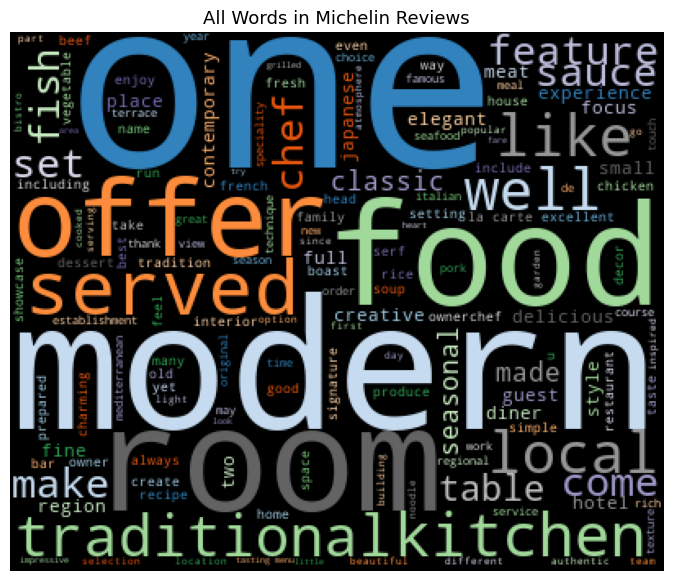

In [ ]:
# Word cloud for all words
generate_basic_wordcloud(all_words, "All Words in Michelin Reviews")

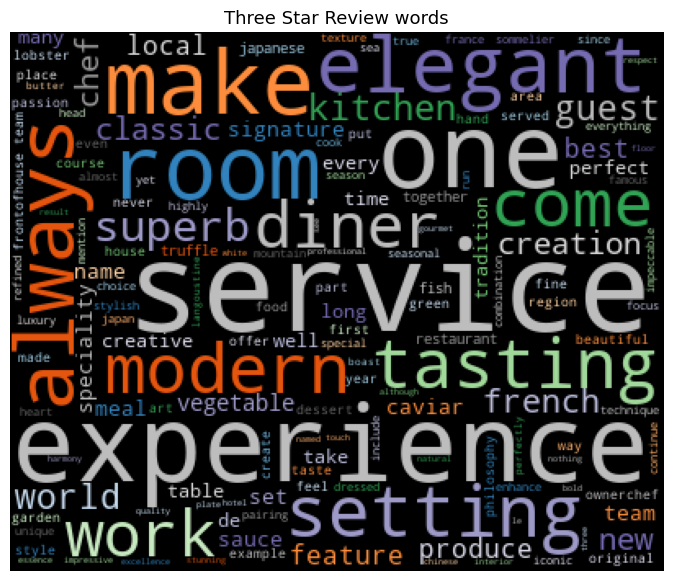

In [ ]:
generate_basic_wordcloud(all_threestar_words, 'Three Star Review words')

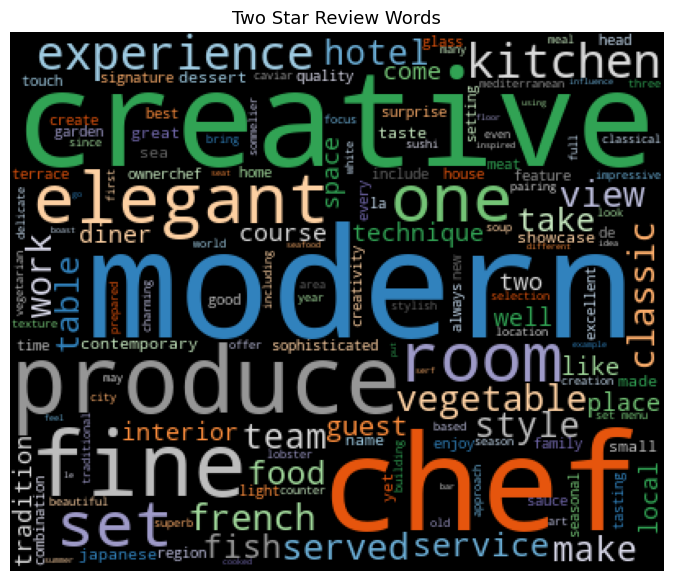

In [ ]:
generate_basic_wordcloud(all_twostar_words, "Two Star Review Words")

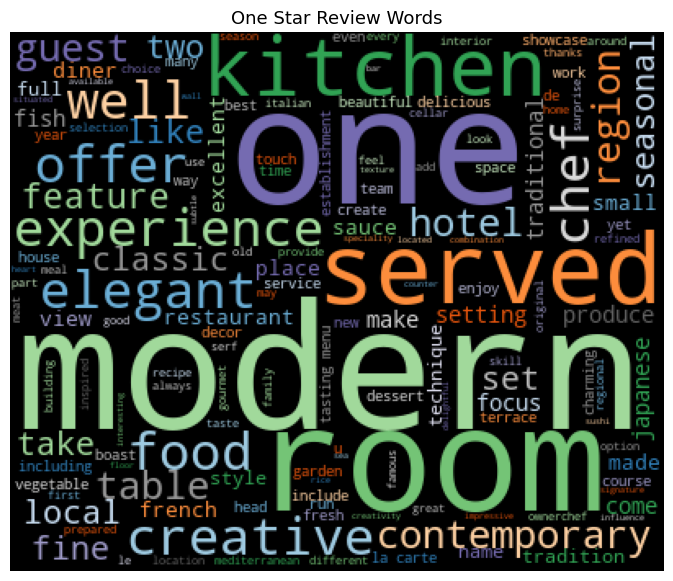

In [ ]:
generate_basic_wordcloud(all_onestar_words, "One Star Review Words")


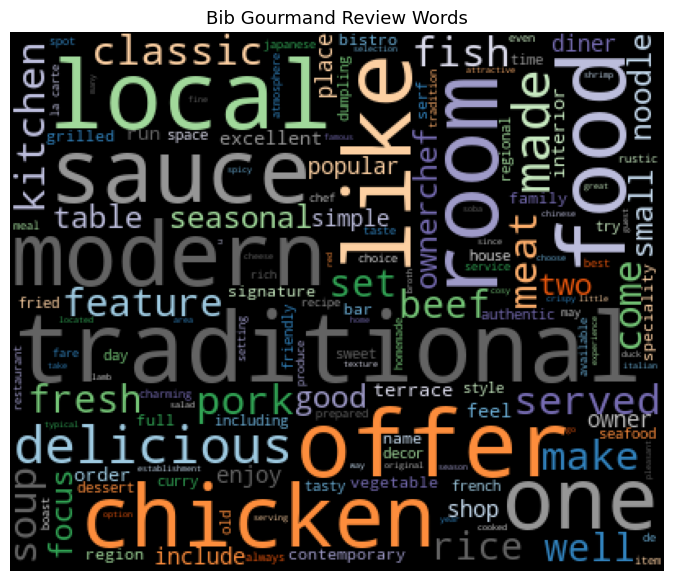

In [ ]:
generate_basic_wordcloud(all_bib_words, "Bib Gourmand Review Words")

In [ ]:
# Getting top 20 bigrams for award categories
top_20_threestar_bigrams = (pd.Series(nltk.ngrams(threestar_words, 2))
                      .value_counts()
                      .head(20))

top_20_twostar_bigrams = (pd.Series(nltk.ngrams(twostar_words, 2))
                      .value_counts()
                      .head(20))

top_20_onestar_bigrams = (pd.Series(nltk.ngrams(onestar_words, 2))
                      .value_counts()
                      .head(20))

top_20_bib_bigrams = (pd.Series(nltk.ngrams(bib_words, 2))
                      .value_counts()
                      .head(20))

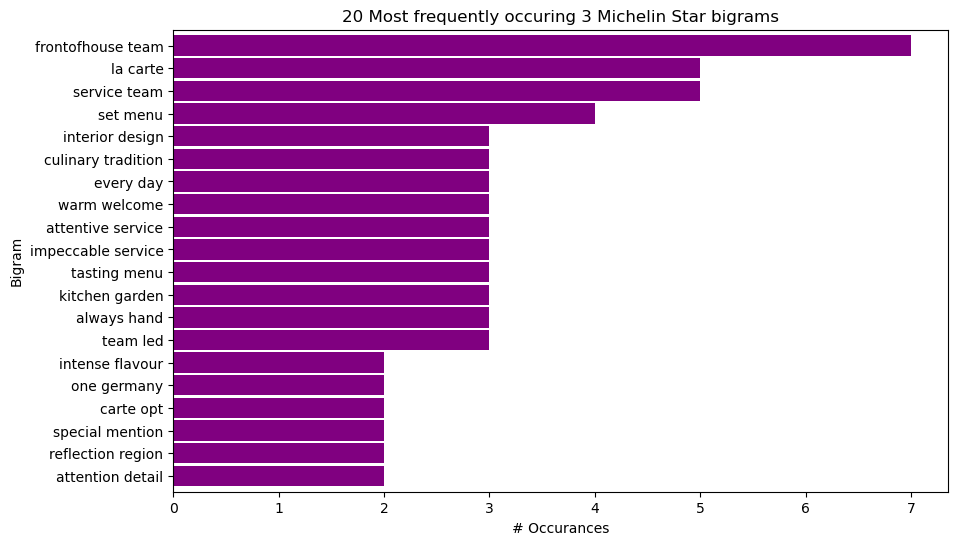

In [ ]:
top_20_threestar_bigrams.sort_values(ascending=True).plot.barh(color='purple', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring 3 Michelin Star bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_threestar_bigrams.sort_values(ascending=True).reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

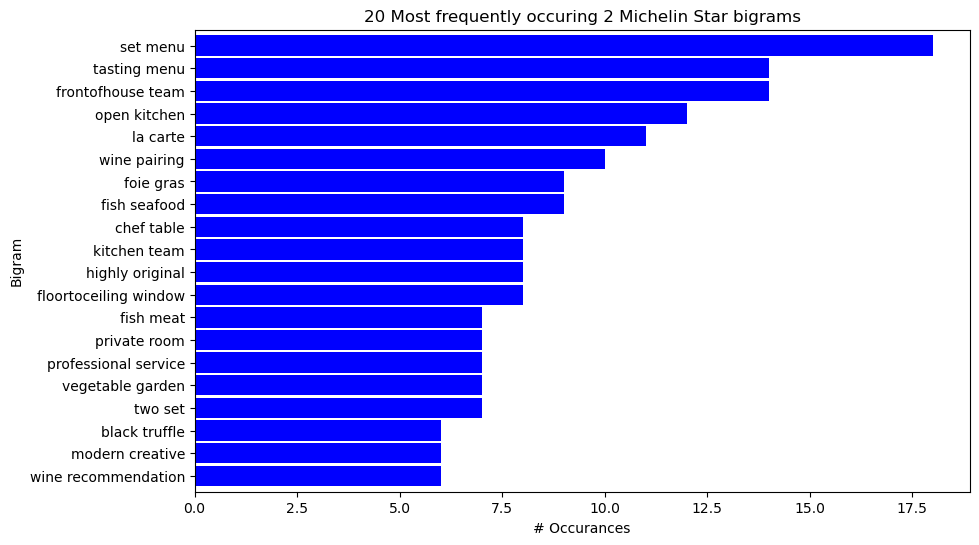

In [ ]:
top_20_twostar_bigrams.sort_values(ascending=True).plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring 2 Michelin Star bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_twostar_bigrams.sort_values(ascending=True).reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

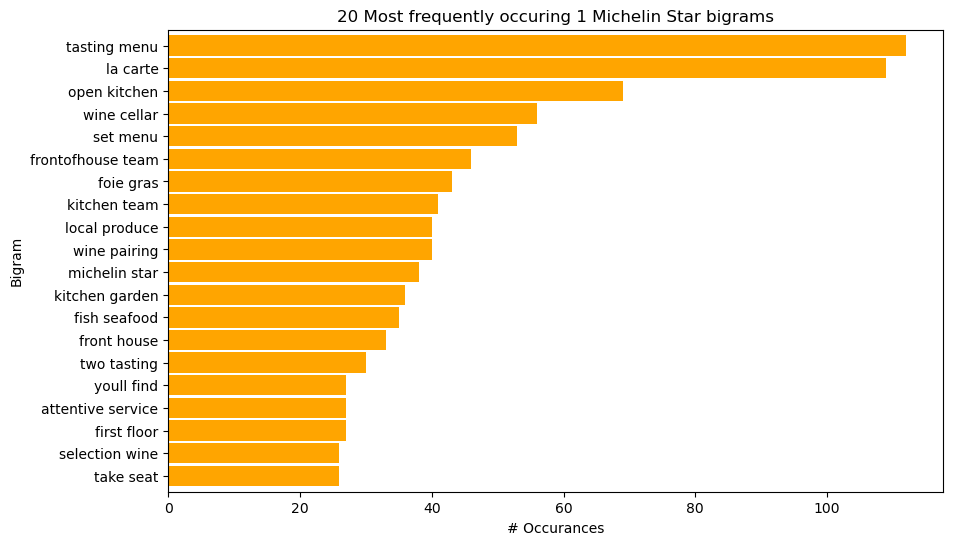

In [ ]:
top_20_onestar_bigrams.sort_values(ascending=True).plot.barh(color='orange', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring 1 Michelin Star bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_onestar_bigrams.sort_values(ascending=True).reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

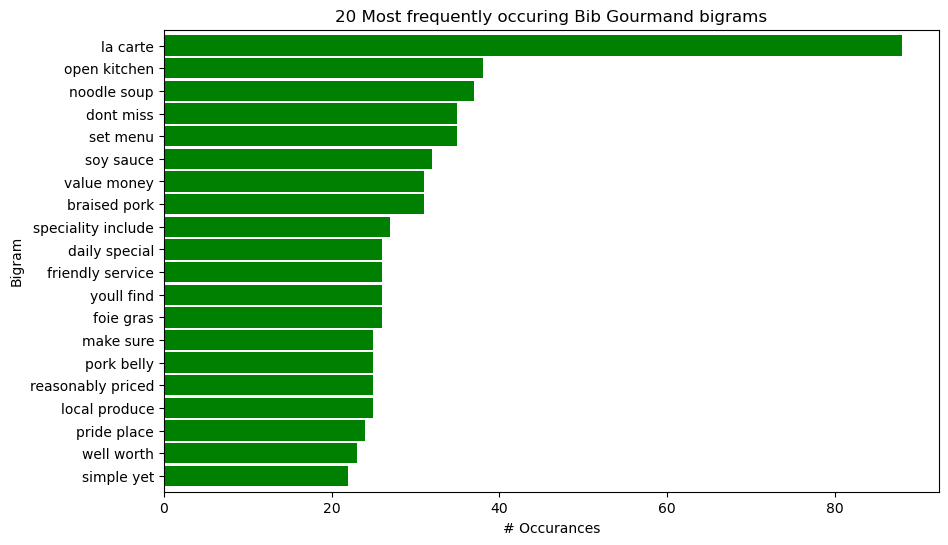

In [ ]:
# Bib Gourmand

top_20_bib_bigrams.sort_values(ascending=True).plot.barh(color='green', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Bib Gourmand bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_bib_bigrams.sort_values(ascending=True).reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# WordClouds

In [ ]:
def get_threestar_wordcloud():
    '''
    '''
    #Import TXT file of all three star words
    threestar_text = open(
            "./images/all_threestar_words.txt",
            mode='r', encoding='utf-8').read()
    #Import .png file of three star logo, create a Numpy array mask from the image
    mask = np.array(Image.open("./images/three_stars.png"))
    # replace 0 with 255 inside the mask to ensure white background
    mask[mask == 0] = 255
    # Define Colors
    colors = ['purple', 'gold']
    custom_cmap = mcolors.ListedColormap(colors)
    #Make the wordcloud, generate the image
    wc = WordCloud(
               mask = mask, background_color = "black",
               max_words = 400, max_font_size = 500,
               random_state = 42, width = mask.shape[1],
               colormap= custom_cmap,
               contour_color='gold', contour_width=2,
               height = mask.shape[0])
    wc.generate(threestar_text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

ValueError: operands could not be broadcast together with shapes (837,1024,4) (837,1024,3) 

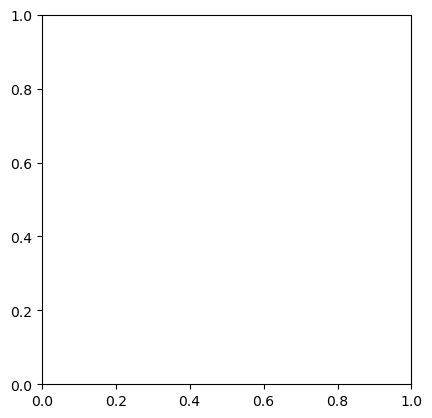

In [ ]:
e.get_threestar_wordcloud()

In [ ]:
def get_twostar_wordcloud():
    '''
    '''
    #Import TXT file of all two star words
    twostar_text = open("./images/all_twostar_words.txt",
            mode='r', encoding='utf-8').read()
    #Import .png file of three star logo, create a Numpy array mask from the image
    mask = np.array(Image.open("./images/two_star_logo.png"))
    # replace 0 with 255 inside the mask to ensure white background
    mask[mask == 0] = 255
    # Define Colors
    colors = ['blue', 'red']
    custom_cmap = mcolors.ListedColormap(colors)
    #Make the wordcloud, generate the image
    wc = WordCloud(
               mask = mask, background_color = "white",
               max_words = 1500, max_font_size = 500,
               random_state = 42, width = mask.shape[1],
               colormap= custom_cmap,
               contour_color='blue', contour_width=1,
               height = mask.shape[0])
    wc.generate(twostar_text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

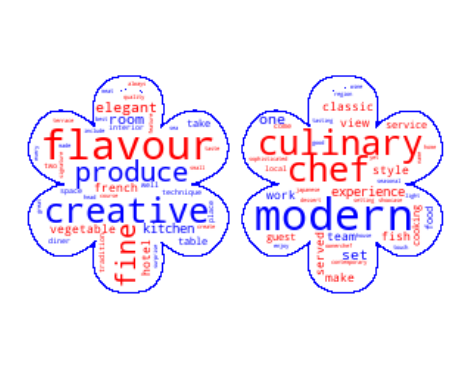

In [ ]:
get_twostar_wordcloud()

In [ ]:
def get_onestar_wordcloud():
    '''
    '''
    #Import TXT file of all one star words
    onestar_text = open("./images/all_onestar_words.txt",
            mode='r', encoding='utf-8').read()
    #Import .png file of three star logo, create a Numpy array mask from the image
    mask = np.array(Image.open("./images/one_star_heart.png"))
    # replace 0 with 255 inside the mask to ensure white background
    mask[mask == 0] = 255
    # Define Colors
    colors = ['firebrick', 'orangered']
    custom_cmap = mcolors.ListedColormap(colors)
    #Make the wordcloud, generate the image
    wc = WordCloud(
               mask = mask, background_color = "lightgray",
               max_words = 250, max_font_size = 500,
               random_state = 42, width = mask.shape[1],
               colormap= custom_cmap,
               contour_color='crimson', contour_width=1.5,
               height = mask.shape[0])
    wc.generate(onestar_text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

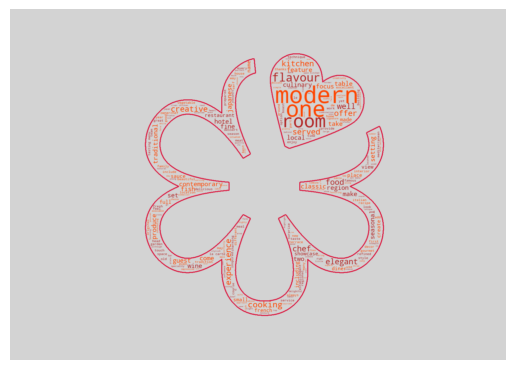

In [ ]:
e.get_onestar_wordcloud()

In [ ]:
# Bib Gourmand Word Cloud

def get_bib_wordcloud():
    '''
    '''
    #Import TXT file of all bib gourmand star words
    bib_text = open("./images/all_bib_words.txt",
            mode='r', encoding='utf-8').read()
    #Import .png file of bib gourmand image, create a Numpy array mask from the image
    mask = np.array(Image.open("./images/bib_gourmand.png"))
    # replace 0 with 255 inside the mask to ensure white background
    mask[mask == 0] = 255
    # Define Colors
    colors = ['darkred', 'orangered']
    custom_cmap = mcolors.ListedColormap(colors)
    #Make the wordcloud, generate the image
    wc = WordCloud(
               mask = mask, background_color = "white",
               max_words = 500, max_font_size = 500,
               random_state = 42, width = mask.shape[1],
               colormap= custom_cmap,
               contour_color='maroon', contour_width=1.5,
               height = mask.shape[0])
    wc.generate(bib_text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()


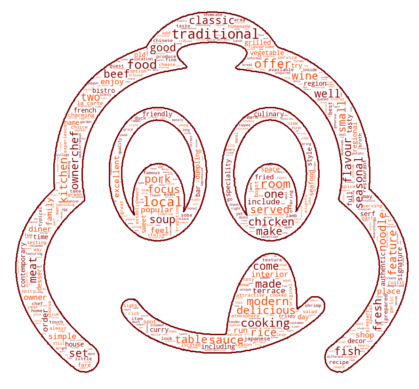

In [ ]:
e.get_bib_wordcloud()

### Making country dataframes for top 5 countries

In [ ]:
# Making corpus files for countries
#Make dataframes by award category
train_france = train[train.country== 'france']
train_japan = train[train.country== 'japan']
train_italy = train[train.country== 'italy']
train_usa = train[train.country== 'usa']
train_germany = train[train.country== 'germany']


In [ ]:
#Making a list of france words
france_words = []
for i in train_france['lemmatized']:
    for word in i.split(): #Splitting the sentence into words
        france_words.append(word) #appending each word to the list
        
#Making a list of japan words
japan_words = []
for i in train_japan['lemmatized']:
    for word in i.split(): #Splitting the sentence into words
        japan_words.append(word) #appending each word to the list

#Making a list of italy words
italy_words = []
for i in train_italy['lemmatized']:
    for word in i.split(): #Splitting the sentence into words
        italy_words.append(word) #appending each word to the list

#Making a list of usa words
usa_words = []
for i in train_usa['lemmatized']:
    for word in i.split(): #Splitting the sentence into words
        usa_words.append(word) #appending each word to the list
        

#Making a list of germany words
germany_words = []
for i in train_germany['lemmatized']:
    for word in i.split(): #Splitting the sentence into words
        germany_words.append(word) #appending each word to the list


In [ ]:
#Turning country words into series based on value counts
france_freq = pd.Series(france_words).value_counts()
japan_freq = pd.Series(japan_words).value_counts()
italy_freq = pd.Series(italy_words).value_counts()
usa_freq = pd.Series(usa_words).value_counts()
germany_freq = pd.Series(germany_words).value_counts()

In [ ]:
#Frequency of france words
print(france_freq.nlargest(10))

produce      158
fine         130
local        120
de           113
food         110
vegetable    108
wine         100
flavour       95
modern        93
garden        93
dtype: int64


In [ ]:
# Freq of Japan words
print(japan_freq.nlargest(10))

ownerchef    180
japanese     125
sauce        120
rice         113
soba          95
made          94
vegetable     90
sushi         84
served        82
chicken       80
dtype: int64


In [ ]:
# Freq of Italy words
print(italy_freq.nlargest(10))

wine           154
room           131
local          130
fish           128
excellent      114
modern         108
guest          106
focus           97
region          96
traditional     95
dtype: int64


In [ ]:
# Freq of usa words
print(usa_freq.nlargest(10))

like       169
kitchen    130
sauce      105
room        92
may         92
flavor      85
sweet       78
cooking     75
make        74
dessert     73
dtype: int64


In [ ]:
# Freq of Germany words
print(germany_freq.nlargest(10))

modern      195
set         153
wine        132
friendly    105
team        104
service      98
regional     98
classic      89
produce      89
terrace      87
dtype: int64


In [ ]:
# Make a list of all words from the individual countries
all_france_words = ' '.join(train_france['lemmatized'])
all_japan_words = ' '.join(train_japan['lemmatized'])
all_italy_words = ' '.join(train_italy['lemmatized'])
all_usa_words = ' '.join(train_usa['lemmatized'])
all_germany_words = ' '.join(train_germany['lemmatized'])

In [ ]:
# # Write words for each review category to text files

# Write france text to txt file
text_file = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_france_words.txt', 'w')
text_file.write(all_france_words)
text_file.close()

# Write all japan text to txt file
text_file = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_japan_words.txt', 'w')
text_file.write(all_japan_words)
text_file.close()

# Italy Words
text_file = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_italy_words.txt', 'w')
text_file.write(all_italy_words)
text_file.close()

# USA words
text_file = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_usa_words.txt', 'w')
text_file.write(all_usa_words)
text_file.close()

#Germany
text_file = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_germany_words.txt', 'w')
text_file.write(all_germany_words)
text_file.close()

In [ ]:
#Creating text for wordclouds

france_text = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_france_words.txt',
            mode='r', encoding='utf-8').read()
japan_text = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_japan_words.txt',
            mode='r', encoding='utf-8').read()
italy_text = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_italy_words.txt',
            mode='r', encoding='utf-8').read()
usa_text = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_usa_words.txt',
            mode='r', encoding='utf-8').read()
germany_text = open(r'/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/images/all_germany_words.txt',
                     mode='r', encoding='utf-8').read()

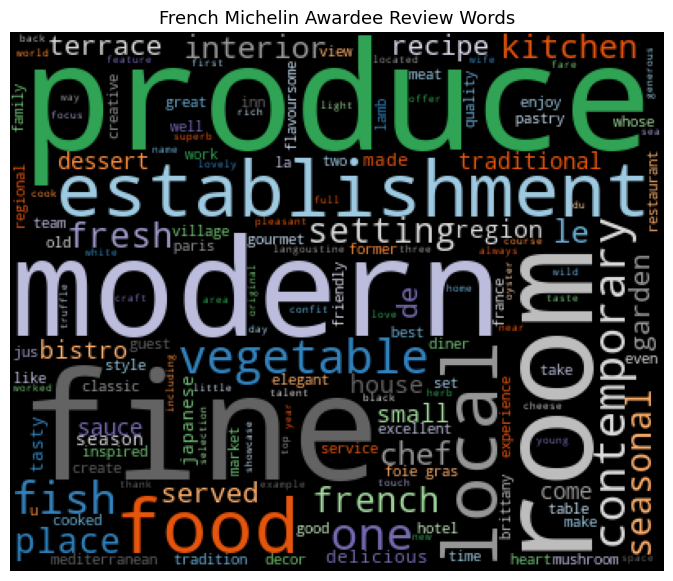

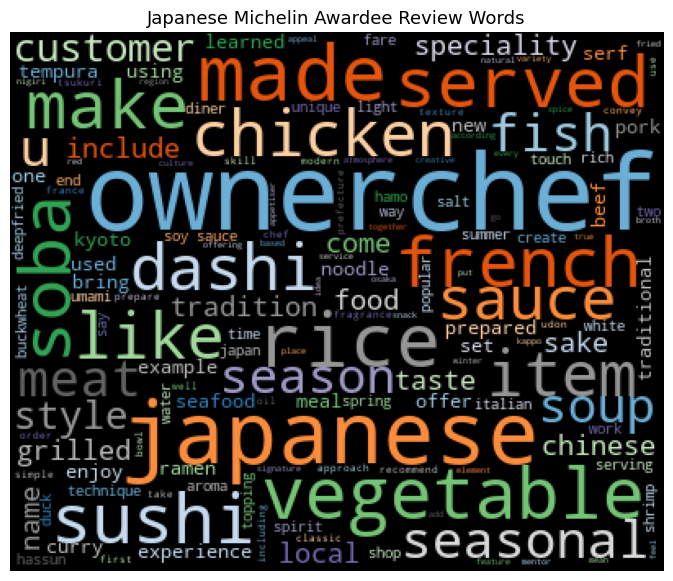

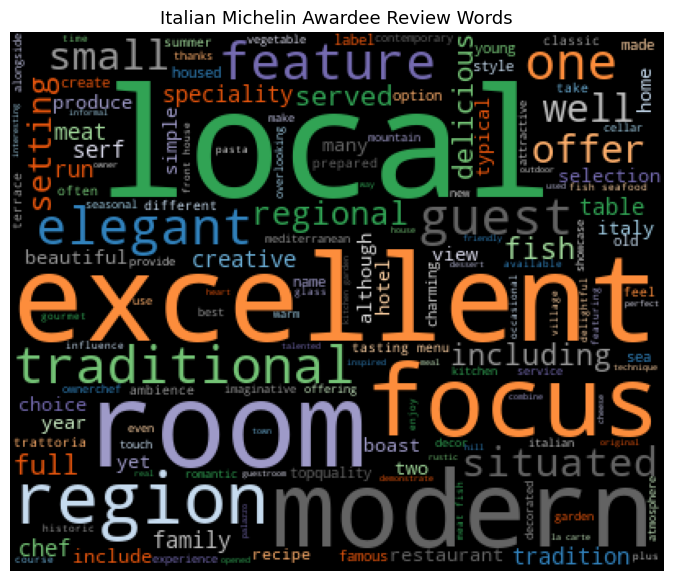

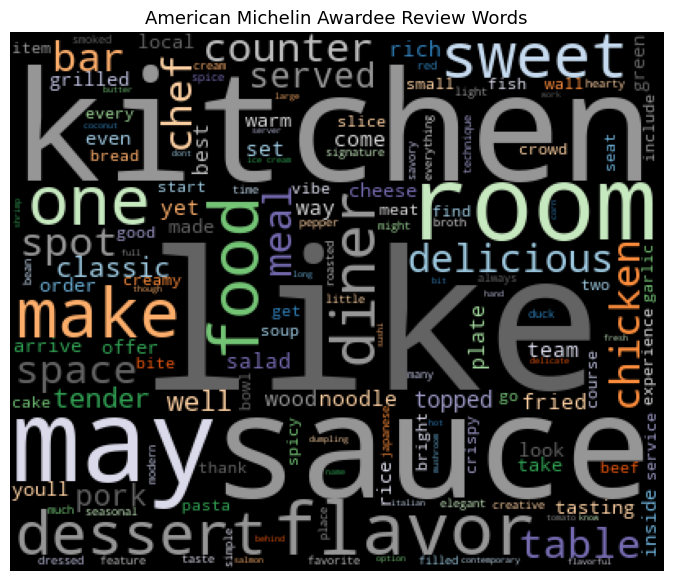

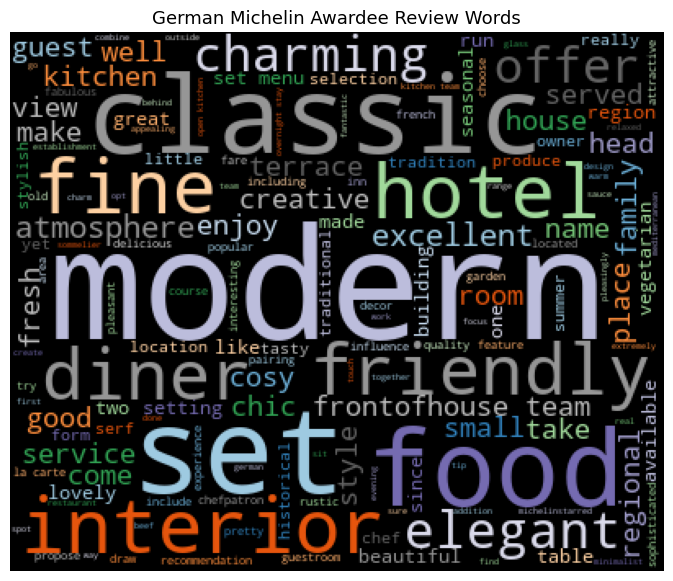

In [ ]:
generate_basic_wordcloud(all_france_words, 'French Michelin Awardee Review Words')
generate_basic_wordcloud(all_japan_words, 'Japanese Michelin Awardee Review Words')
generate_basic_wordcloud(all_italy_words, 'Italian Michelin Awardee Review Words')
generate_basic_wordcloud(all_usa_words, 'American Michelin Awardee Review Words')
generate_basic_wordcloud(all_germany_words, 'German Michelin Awardee Review Words')

In [ ]:
# France

def get_croissant_wordcloud():
    '''
    '''
    #Import TXT file of all bib gourmand star words
    france_text = open("./images/all_france_words.txt",
            mode='r', encoding='utf-8').read()
    #Import .png file of bib gourmand image, create a Numpy array mask from the image
    mask = np.array(Image.open("./images/croissant.png"))
    # replace 0 with 255 inside the mask to ensure white background
    mask[mask == 0] = 255
    # Define Colors
    colors = ['peru', 'chocolate']
    custom_cmap = mcolors.ListedColormap(colors)
    #Make the wordcloud, generate the image
    wc = WordCloud(
               mask = mask, background_color = "white",
               max_words = 500, max_font_size = 500,
               random_state = 42, width = mask.shape[1],
               colormap= custom_cmap,
               contour_color='peru', contour_width=1,
               height = mask.shape[0])
    wc.generate(france_text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

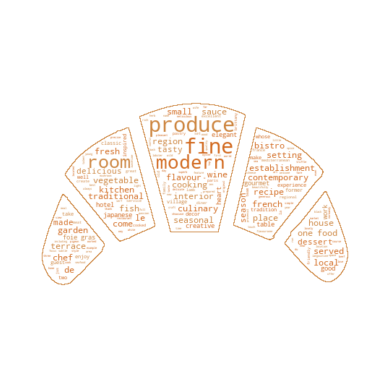

In [ ]:
get_croissant_wordcloud()

In [ ]:
# Get Baguette wordcloud

# France

def get_baguette_wordcloud():
    '''
    '''
    #Import TXT file of all bib gourmand star words
    france_text = open("./images/all_france_words.txt",
            mode='r', encoding='utf-8').read()
    #Import .png file of bib gourmand image, create a Numpy array mask from the image
    mask = np.array(Image.open("./images/baguette.png"))
    # replace 0 with 255 inside the mask to ensure white background
    mask[mask == 0] = 255
    # Define Colors
    colors = ['peru', 'chocolate']
    custom_cmap = mcolors.ListedColormap(colors)
    #Make the wordcloud, generate the image
    wc = WordCloud(
               mask = mask, background_color = "white",
               max_words = 500, max_font_size = 500,
               random_state = 42, width = mask.shape[1],
               colormap= custom_cmap,
               contour_color='peru', contour_width=1.5,
               height = mask.shape[0])
    wc.generate(france_text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

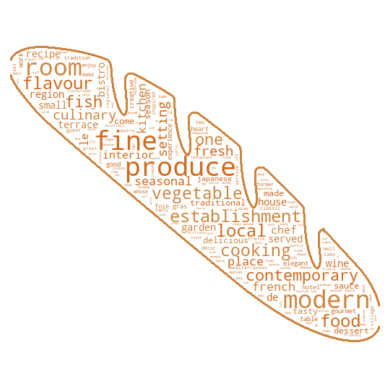

In [ ]:
get_baguette_wordcloud()

In [ ]:
# Japan

def get_shrimp_wordcloud():
    '''
    '''
    #Import TXT file of all bib gourmand star words
    japan_text = open("./images/all_japan_words.txt",
            mode='r', encoding='utf-8').read()
    #Import .png file of bib gourmand image, create a Numpy array mask from the image
    mask = np.array(Image.open("./images/shrimp.png"))
    # replace 0 with 255 inside the mask to ensure white background
    mask[mask == 0] = 255
    # Define Colors
    colors = ['darkorange', 'lightsalmon']
    custom_cmap = mcolors.ListedColormap(colors)
    #Make the wordcloud, generate the image
    wc = WordCloud(
               mask = mask, background_color = "whitesmoke",
               max_words = 500, max_font_size = 500,
               random_state = 42, width = mask.shape[1],
               colormap= custom_cmap,
               contour_color='darkorange', contour_width=1,
               height = mask.shape[0])
    wc.generate(japan_text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

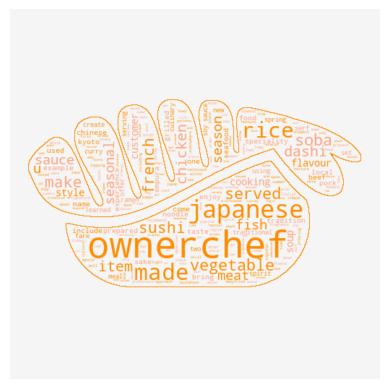

In [ ]:
get_shrimp_wordcloud()

In [ ]:
def get_boot_wordcloud():
    '''
    '''
    #Import TXT file of all bib gourmand star words
    italy_text = open("./images/all_italy_words.txt",
            mode='r', encoding='utf-8').read()
    #Import .png file of bib gourmand image, create a Numpy array mask from the image
    mask = np.array(Image.open("./images/italy_boot.png"))
    # replace 0 with 255 inside the mask to ensure white background
    mask[mask == 0] = 255
    # Define Colors
    colors = ['red', 'green']
    custom_cmap = mcolors.ListedColormap(colors)
    #Make the wordcloud, generate the image
    wc = WordCloud(
               mask = mask, background_color = "white",
               max_words = 500, max_font_size = 500,
               random_state = 42, width = mask.shape[1],
               colormap= custom_cmap,
               contour_color='red', contour_width=1,
               height = mask.shape[0])
    wc.generate(italy_text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

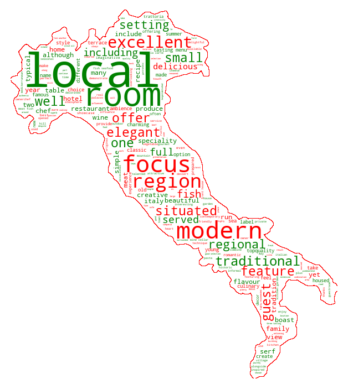

In [ ]:
get_boot_wordcloud()

# Visualizations

In [ ]:
def get_award_freq(train):
    '''
    This function takes in the training data set and creates a countplot
    utilizing Seaborn to visualize the range and values of programming
    languages in GitHub Repositories'''
    sns.set_style("darkgrid")
    fig, axes = plt.subplots(figsize=(9, 6))
    colors = ['#ddeac1','#8e9189', '#494449', '#857f74']
    sns.set_palette(sns.color_palette(colors))
    cpt = sns.countplot(x='award',
                        data=train,
                        palette=colors,
                        order = train['award'].value_counts().index)
    plt.title('Bib Gourmand is the Most Common Award Level in our Dataset')
    plt.xlabel("Award Level")
    plt.ylabel('Count of Restaurants')
    for tick in axes.xaxis.get_major_ticks():
        tick.label1.set_fontsize(10)
    plt.show()

In [ ]:
reload(e)

<module 'explore' from '/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/explore.py'>

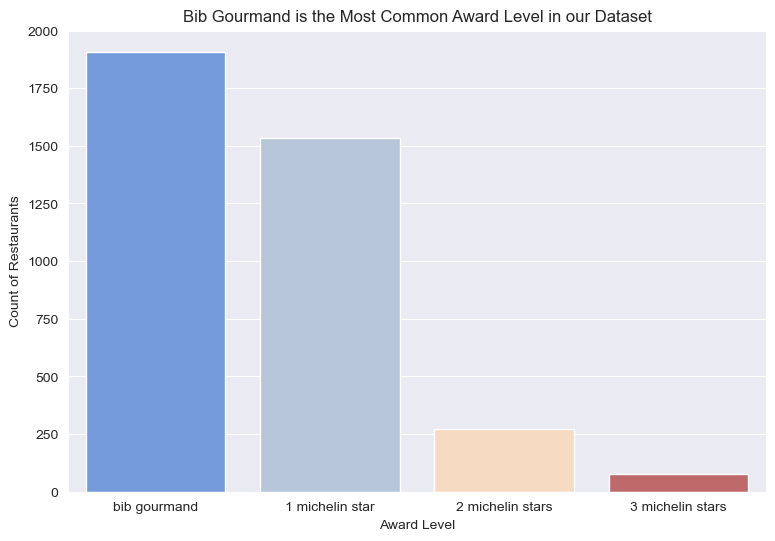

In [ ]:
e.get_award_freq(train)

In [ ]:
reload(e)

<module 'explore' from '/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/explore.py'>

In [ ]:
train.groupby('award').word_count.mean().sort_values(ascending=False)

award
3 michelin stars    61.151899
2 michelin stars    57.155556
1 michelin star     56.585286
bib gourmand        40.477463
Name: word_count, dtype: float64

In [ ]:
star_palette = {'3 michelin stars': '#857f74',
                '2 michelin stars': '#ddeac1',
                '1 michelin star':'#8e9189',
                'bib gourmand' : '#494449'}

In [ ]:
def get_wordcount_bar(train):
    '''
    This function takes in the training dataset and creates a bar plot of the
    average wordcount of a review based on the Michelin Star Award
    '''
    # Use groupby to get an average length per language
    review_wc = train.groupby('award').word_count.mean().sort_values(ascending=False)
    # Set style, make a chart
    sns.set_style("darkgrid")
    fig, axes = plt.subplots(figsize=(9, 6))
    ax = sns.barplot(x=review_wc.values, 
                 y=review_wc.index, palette='coolwarm_r',
                 order=['3 michelin stars', '2 michelin stars', '1 michelin star', 'bib gourmand'])
    ax.set_yticklabels(
        ['3 Michelin Stars', '2 Michelin Stars', '1 Michelin Star', 'Bib Gourmand'])
    plt.title('Average Wordcount of Michelin Star Level Restaurants')
    plt.xlabel("Average Word Count")
    plt.ylabel('Award Level')
    plt.show()

In [ ]:
reload(e)

<module 'explore' from '/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/explore.py'>

ValueError: 'AWARD_COLORS' is not a valid palette name

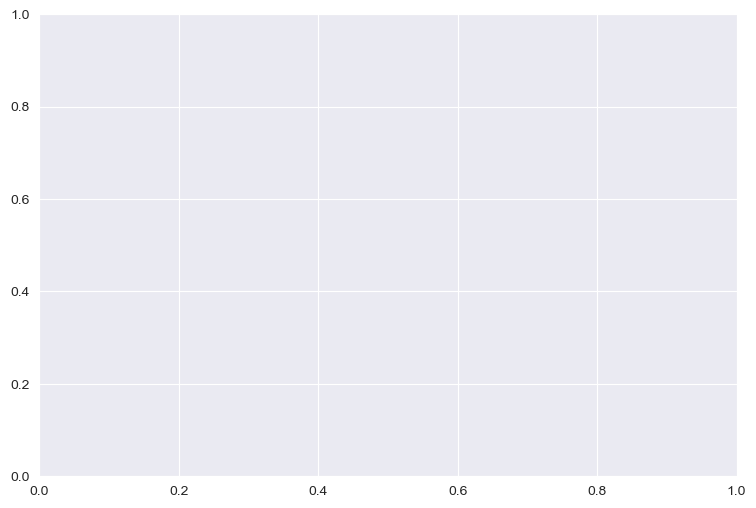

In [ ]:
e.get_wordcount_bar(train)

In [ ]:
def top_10_country_viz(train):
    '''
    This function takes in the training dataset and creates a bar plot of the
    top 10 countries with Michelin restaurants
    '''
    # Use groupby to get an average length per language
    top_10_countries = train['country'].value_counts().head(10)
    # Set style, make a chart
    sns.set_style("darkgrid")
    fig, axes = plt.subplots(figsize=(9, 6))
    ax = sns.barplot (x=top_10_countries.index,
                      y=top_10_countries.values,
                      palette='mako')
    plt.title('Countries with the Most Michelin Restaurants')
    plt.xlabel("Countries")
    plt.ylabel('Number of Restaurants')
    plt.show()

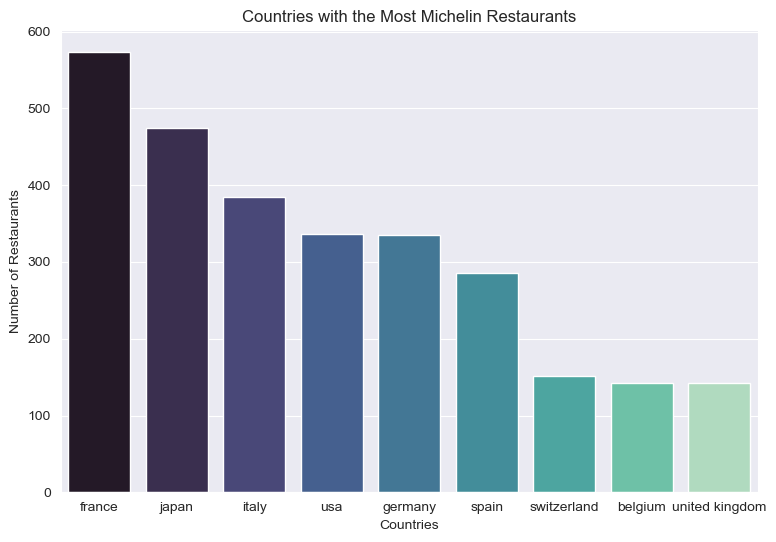

In [ ]:
e.top_10_country_viz(train)

In [ ]:
# Mean word count of each 
print(f'Average Bib Gourmand Word Length is : {train_bib.word_count.mean()}')
print(f'Average Michelin One Star Word Length is : {train_onestar.word_count.mean()}')
print(f'Average Michelin Two Star Word Length is : {train_twostar.word_count.mean()}')
print(f'Average Michelin Three Star Word Length is : {train_threestar.word_count.mean()}')

Average Bib Gourmand Word Length is : 40.477463312368975
Average Michelin One Star Word Length is : 56.585286458333336
Average Michelin Two Star Word Length is : 57.15555555555556
Average Michelin Three Star Word Length is : 61.151898734177216


In [ ]:
def get_anova_wordcount(train):
    '''
    This function creates separate dataframes for
    each award category, and utilizes an ANOVA test
    to compare the mean word count of each category. It
    returns the test statistic, p-value, and treatment
    of the null hypothesis
    '''
    # Create separate df for each category
    train_bib = train[train.award == 'bib gourmand']
    train_onestar = train[train.award == '1 michelin star']
    train_twostar = train[train.award == '2 michelin stars']
    train_threestar = train[train.award == '3 michelin stars']
    # set alpha
    alpha = 0.05
    # Run the test
    f, p = stats.f_oneway(train_bib.word_count, train_onestar.word_count,
                 train_twostar.word_count, train_threestar.word_count)
    if p < alpha:
        print("We reject the null hypothesis. There is sufficient \n\
            evidence to conclude that the word count is significantly \n\
                different between award categories.")
    else:
        print("We fail to reject the null hypothesis.")
    return print(f'Test Statistic: {f}, P Statistic: {p}')
    
    

In [ ]:
# Running anova between award categories (word count)
e.get_anova_wordcount(train)

We reject the null hypothesis. There is sufficient
evidence to conclude that the word count is significantly
different between award categories.
Test Statistic: 303.75223962496466, P Statistic: 1.0376643924493788e-176


In [ ]:
def sentiment_scores_bar(train):
    dfg = train.groupby(['award'])['sentiment'].mean().sort_values(ascending=False)
    sns.set_style("darkgrid")
    fig, axes = plt.subplots(figsize=(9, 6))
    ax = sns.barplot(x=dfg.index, 
                 y=dfg.values, palette='coolwarm_r',
                 order=['2 michelin stars', '1 michelin star', '3 michelin stars', 'bib gourmand'],
                 orient='v')
    plt.title("Two Star Restaurant Reviews Have the Highest Sentiment Scores")
    ax.set_xticklabels(
        ['2 Michelin Stars', '1 Michelin Star', '3 Michelin Stars', 'Bib Gourmand'])
    plt.xlabel("Award Category")
    plt.ylabel("Sentiment Score")
    plt.show()

In [ ]:
reload(e)

<module 'explore' from '/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/explore.py'>

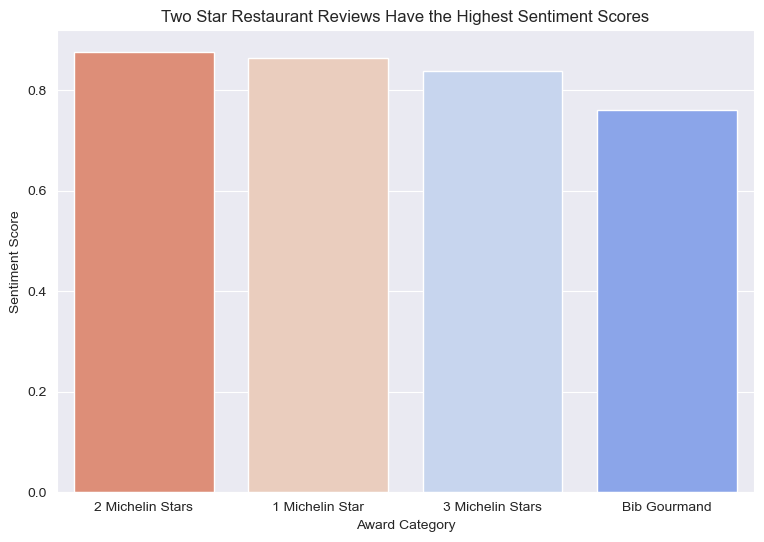

In [ ]:
e.sentiment_scores_bar(train)

In [ ]:
reload(e)

<module 'explore' from '/Users/crislucin/codeup-data-science/Michelin_NLP_Capstone/explore.py'>

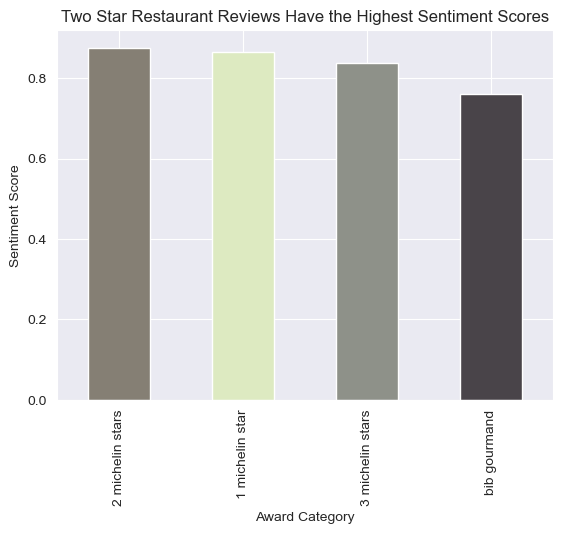

In [ ]:
e.sentiment_scores_bar(train)

In [ ]:
print(f'Three Star Sentiment average is :{train_threestar.sentiment.mean()}')
print(f'Two Star Sentiment average is :{train_onestar.sentiment.mean()}')
print(f'One Star Sentiment average is :{train_twostar.sentiment.mean()}')
print(f'Bib Gourmand Sentiment average is :{train_bib.sentiment.mean()}')

Three Star Sentiment average is :0.837746835443038
Two Star Sentiment average is :0.8650354817708318
One Star Sentiment average is :0.8756225925925916
Bib Gourmand Sentiment average is :0.7599088050314439


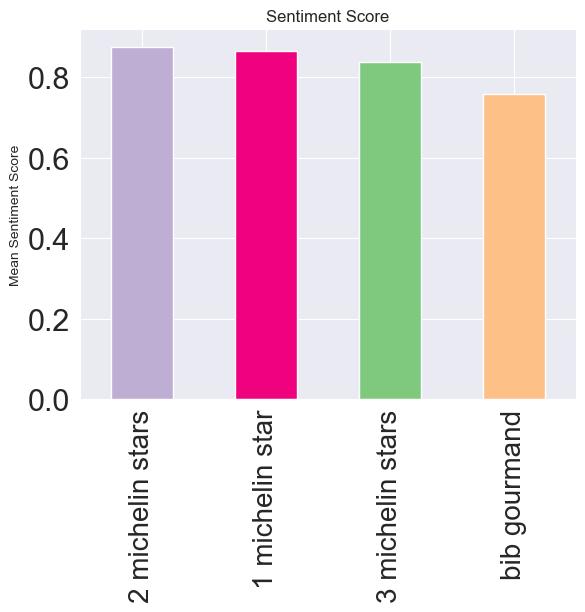

In [ ]:
sentiment_scores_bar(train)

In [ ]:
def get_stats_ttest(df):
    '''Function returns statistical T test'''
    Two_Star = df[df.award == '2 michelin stars']
    Three_Star = df[df.award == '3 michelin stars']
    stat, pval = stats.levene(Two_Star.sentiment,
                              Three_Star.sentiment)
    alpha = 0.05
    if pval < alpha:
        variance = False

    else:
        variance = True
    t_stat, p_val = stats.ttest_ind(Two_Star.sentiment,
                                    Three_Star.sentiment,
                                    equal_var=True, random_state=123)

    print(f't_stat= {t_stat}, p_value= {p_val/2}')
    print('-----------------------------------------------------------')
    if (p_val/2) < alpha:
        print(f'We reject the null Hypothesis')
    else:
        print(f'We fail to reject the null Hypothesis. There is no significant difference between the sentiment scores.')

In [ ]:
get_stats_ttest(train)

t_stat= 1.3883345120584822, p_value= 0.08296290733731536
-----------------------------------------------------------
We fail to reject the null Hypothesis. There is no significant difference between the sentiment scores.


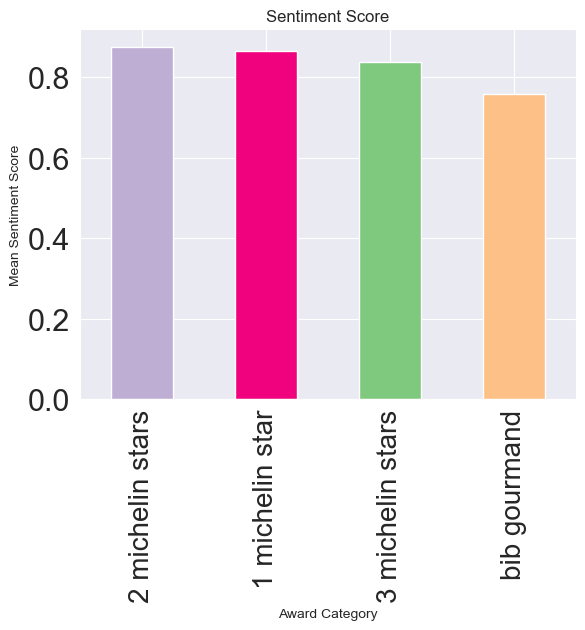

In [ ]:
e.sentiment_scores_bar(train)

# Modeling Using features

In [ ]:
# Get clean data
df = a.get_michelin_pages()

In [ ]:
# Prep the data
train, validate, test = p.prepare_michelin(df)
train.head(2)

name                                            address  \
6345  gasthaus ödenturm               am ödenturm 11, cham, 93413, germany   
6427     weinhaus anker  obertorstraße 13, marktheidenfeld, 97828, germany   

                      location price                                 cuisine  \
6345             cham, germany     €  country cooking, mediterranean cuisine   
6427  marktheidenfeld, germany     €                 french, country cooking   

      longitude   latitude                                                url  \
6345  12.703851  49.210919  https://guide.michelin.com/en/bayern/cham/rest...   
6427   9.600301  49.845621  https://guide.michelin.com/en/bayern/marktheid...   

             award                            facilities_and_services  \
6345  bib gourmand  car park,credit card / debit card accepted,gre...   
6427  bib gourmand  american express credit card,car park,credit c...   

                                                   data  price_level  \
6345  as if straight out of a picture book, this bea...            1   
6427  a restaurant that is steeped in tradition and ...            1   

                 city  country  \
6345             cham  germany   
6427  marktheidenfeld  germany   

                                                  clean  \
6345  straight picture book beautiful inn stands edg...   
6427  steeped tradition run great commitment lovely ...   

                                             lemmatized  sentiment  word_count  
6345  straight picture book beautiful inn stand edge...     0.9648          36  
6427  steeped tradition run great commitment lovely ...     0.9618          32

In [ ]:
# #Getting top three countries for modeling

# top_three_countries = train['country'].value_counts().nlargest(3).index.tolist()
# top_three_countries

In [ ]:
# #This only made a separate df
# country_dummies = pd.get_dummies(train[train['country'].isin(top_three_countries)], columns=['country'])

In [ ]:
# train.country.value_counts().head(5)

In [ ]:
# #convert countries to dummy variable
# pd.get_dummies(train, columns=['country'], drop_first=False)

In [ ]:
# # Keep only the columns we need for modeling
# columns_to_keep = ['sentiment', 'word_count', 'price_level_1', 'price_level_2', 'price_level_3', 'price_level_4',
#                    'country_france', 'country_japan', 'country_italy', 'country_usa', 'country_germany']
                   

In [ ]:
# dummy_df = pd.get_dummies(train, columns=['country', 'price_level'], drop_first=False)

# # Add the dummy variables to the original dataframe
# train = train.assign(**dummy_df)
# train.head()

In [ ]:
# def prep_classification_data(train, validate, test):
#     '''
#     This function takes in train, validate, and test and returns
#     train, validate, and test prepped for classification modeling
#     '''
#     # Impute NaN values in sentiment with the mean
#     train['sentiment'].fillna(int(train['sentiment'].mean()), inplace=True)
#     validate['sentiment'].fillna(int(validate['sentiment'].mean()), inplace=True)
#     test['sentiment'].fillna(int(test['sentiment'].mean()), inplace=True)
#     # Create dummy columns
#     dummy_train = pd.get_dummies(train, columns=['country', 'price_level'], drop_first=False)
#     dummy_validate = pd.get_dummies(validate, columns=['country', 'price_level'], drop_first=False)
#     dummy_test = pd.get_dummies(test, columns=['country', 'price_level'], drop_first=False)
#     # Add the dummy variables to the original dataframe
#     train = train.assign(**dummy_train)
#     validate = validate.assign(**dummy_validate)
#     test = test.assign(**dummy_test)
#     # Keep only the columns we need for modeling
#     columns_to_keep = ['award', 'sentiment', 'word_count', 'price_level_1', 'price_level_2',
#                        'price_level_3', 'price_level_4', 'country_france', 'country_japan',
#                        'country_italy', 'country_usa', 'country_germany']
#     train = train[columns_to_keep]
#     validate = validate[columns_to_keep]
#     test = test[columns_to_keep]
    
#     return train, validate, test

In [ ]:
reload(p)
train, validate, test = p.prep_classification_data(train, validate, test)

In [ ]:
# Creating x and y version of train
X_train = train.drop(columns=['award'])
y_train = train.award

X_validate = validate.drop(columns=['award'])
y_validate = validate.award

X_test = test.drop(columns=['award'])
y_test = test.award

### Decision Tree

In [ ]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.
# Create the object
clf = DecisionTreeClassifier(max_depth=4, random_state=123)
# Fit the model
clf = clf.fit(X_train, y_train)

In [ ]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)

In [ ]:
y_pred[0:5]

array(['bib gourmand', 'bib gourmand', 'bib gourmand', 'bib gourmand',
       '1 michelin star'], dtype=object)

In [ ]:
# Estimate Probability
y_pred_proba = clf.predict_proba(X_train)


In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.88


In [ ]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[1476,    0,    0,   60],
       [ 265,    0,    0,    5],
       [  79,    0,    0,    0],
       [  35,    0,    0, 1873]])

In [ ]:
y_train.value_counts()

bib gourmand        1908
1 michelin star     1536
2 michelin stars     270
3 michelin stars      79
Name: award, dtype: int64

In [ ]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

1 michelin star  2 michelin stars  3 michelin stars  \
1 michelin star              1476                 0                 0   
2 michelin stars              265                 0                 0   
3 michelin stars               79                 0                 0   
bib gourmand                   35                 0                 0   

                  bib gourmand  
1 michelin star             60  
2 michelin stars             5  
3 michelin stars             0  
bib gourmand              1873

In [ ]:
print(classification_report(y_train, y_pred))

                  precision    recall  f1-score   support

 1 michelin star       0.80      0.96      0.87      1536
2 michelin stars       0.00      0.00      0.00       270
3 michelin stars       0.00      0.00      0.00        79
    bib gourmand       0.97      0.98      0.97      1908

        accuracy                           0.88      3793
       macro avg       0.44      0.49      0.46      3793
    weighted avg       0.81      0.88      0.84      3793



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [ ]:
# Now trying with Random Forest
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [ ]:
X_train.head()

sentiment  word_count  price_level_1  price_level_2  price_level_3  \
6345     0.9648          36              1              0              0   
6427     0.9618          32              1              0              0   
5217     0.6908          47              1              0              0   
3858     0.9246          45              0              1              0   
124      0.9686          39              0              0              0   

      price_level_4  country_france  country_japan  country_italy  \
6345              0               0              0              0   
6427              0               0              0              0   
5217              0               0              0              0   
3858              0               0              0              0   
124               1               0              0              0   

      country_usa  country_germany  
6345            0                1  
6427            0                1  
5217            0                0  
3858            0                0  
124             0                0

In [ ]:
# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [ ]:
print(rf.feature_importances_)

[0.01978237 0.08130029 0.17729825 0.34082563 0.19385044 0.17064597
 0.00194998 0.00166782 0.00211693 0.0081754  0.00238694]


In [ ]:
# Make predictions
y_pred = rf.predict(X_train)

In [ ]:
# Estimate the probability
y_pred_proba = rf.predict_proba(X_train)

In [ ]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.88


In [ ]:
print(confusion_matrix(y_train, y_pred))

[[1465    0    0   71]
 [ 265    0    0    5]
 [  79    0    0    0]
 [  28    0    0 1880]]


In [ ]:
print(classification_report(y_train, y_pred))

                  precision    recall  f1-score   support

 1 michelin star       0.80      0.95      0.87      1536
2 michelin stars       0.00      0.00      0.00       270
3 michelin stars       0.00      0.00      0.00        79
    bib gourmand       0.96      0.99      0.97      1908

        accuracy                           0.88      3793
       macro avg       0.44      0.48      0.46      3793
    weighted avg       0.81      0.88      0.84      3793



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.89


### K Nearest Neighbors

In [ ]:
# Make the object with 6 neighbors
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [ ]:
# Fit the object
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions
y_pred = knn.predict(X_train)

In [ ]:
# Estimate proability
y_pred_proba = knn.predict_proba(X_train)

In [ ]:
# Compute accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.89


In [ ]:
print(confusion_matrix(y_train, y_pred))

[[1425   38    2   71]
 [ 191   74    1    4]
 [  69    7    3    0]
 [  27    1    0 1880]]


In [ ]:
print(classification_report(y_train, y_pred))

                  precision    recall  f1-score   support

 1 michelin star       0.83      0.93      0.88      1536
2 michelin stars       0.62      0.27      0.38       270
3 michelin stars       0.50      0.04      0.07        79
    bib gourmand       0.96      0.99      0.97      1908

        accuracy                           0.89      3793
       macro avg       0.73      0.56      0.58      3793
    weighted avg       0.88      0.89      0.87      3793



In [ ]:
print('Accuracy of KNN classifier on validation set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validation set: 0.88


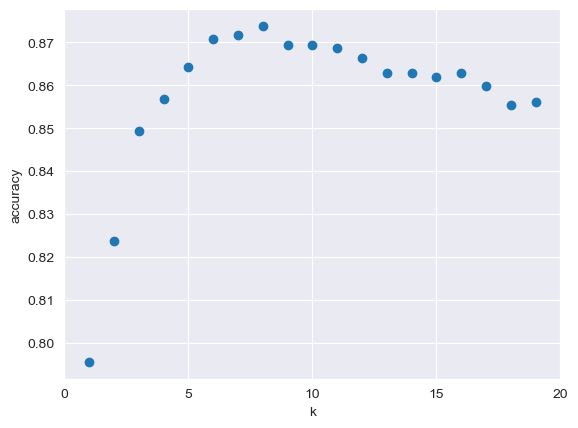

In [ ]:
# Visualizae this
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

### Logistic Regression

In [ ]:
# Need to scale features for this model (Sentiment and Word Count)
train.head(2)

award  sentiment  word_count  price_level_1  price_level_2  \
6345  bib gourmand     0.9648          36              1              0   
6427  bib gourmand     0.9618          32              1              0   

      price_level_3  price_level_4  country_france  country_japan  \
6345              0              0               0              0   
6427              0              0               0              0   

      country_italy  country_usa  country_germany  
6345              0            0                1  
6427              0            0                1

In [ ]:
# Creating x and y version of train
X_train = train.drop(columns=['award'])
y_train = train.award

X_validate = validate.drop(columns=['award'])
y_validate = validate.award

X_test = test.drop(columns=['award'])
y_test = test.award

In [ ]:
# # Select the columns you want to scale
# columns_to_scale = ['sentiment', 'word_count']


# # Fit the scaler to the selected columns
# X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
# X_validate[columns_to_scale] = scaler.fit_transform(X_validate[columns_to_scale])
# X_test[columns_to_scale] = scaler.fit_transform(X_test[columns_to_scale])

# # The selected columns are now scaled

In [ ]:
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(multi_class = 'multinomial', random_state=123, solver='lbfgs')

In [ ]:
logit.fit(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=123)

In [ ]:
# Examine feature importance
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 0.02352515  0.01422824 -2.30635916 -0.18226113  1.80934589  1.1224499
  -0.0554791  -0.2440431   0.44888165 -0.63341957 -0.03711982]
 [ 0.36500481  0.01670078 -1.36777034 -1.45493507  0.11516699  1.49424908
  -0.51441635  0.51624373 -0.42482375 -1.1667175  -0.35028667]
 [-0.98754512  0.02331712 -0.79029596 -1.31797149 -0.83346684  1.36038237
  -0.1144424   0.45395336 -0.06459192 -0.47064179 -0.16910901]
 [ 0.59901516 -0.05424614  4.46442545  2.95516769 -1.09104605 -3.97708135
   0.68433785 -0.72615399  0.04053402  2.27077886  0.5565155 ]]
Intercept: 
 [ 0.45499568 -1.34495053 -1.72830738  2.61826224]


In [ ]:
# Make Predictions
y_pred = logit.predict(X_train)

In [ ]:
# Estimate Probability
y_pred_proba = logit.predict_proba(X_train)

In [ ]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.88


In [ ]:
print(confusion_matrix(y_train, y_pred))

[[1466    0    0   70]
 [ 265    0    0    5]
 [  79    0    0    0]
 [  28    0    0 1880]]


In [ ]:
print(classification_report(y_train, y_pred))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

 1 michelin star       0.80      0.95      0.87      1536
2 michelin stars       0.00      0.00      0.00       270
3 michelin stars       0.00      0.00      0.00        79
    bib gourmand       0.96      0.99      0.97      1908

        accuracy                           0.88      3793
       macro avg       0.44      0.48      0.46      3793
    weighted avg       0.81      0.88      0.84      3793



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Make predicion on validate
y_pred_validate = logit.predict(X_validate)

In [ ]:
# accuracy of model on validate
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

Accuracy: 0.89


In [ ]:
# confusion matrix of model 1
print(confusion_matrix(y_validate, y_pred_validate))

[[634   0   0  24]
 [114   0   0   2]
 [ 34   0   0   0]
 [ 11   0   0 807]]


In [ ]:
# classification report of model 1
print(classification_report(y_validate, y_pred_validate))

                  precision    recall  f1-score   support

 1 michelin star       0.80      0.96      0.87       658
2 michelin stars       0.00      0.00      0.00       116
3 michelin stars       0.00      0.00      0.00        34
    bib gourmand       0.97      0.99      0.98       818

        accuracy                           0.89      1626
       macro avg       0.44      0.49      0.46      1626
    weighted avg       0.81      0.89      0.85      1626



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


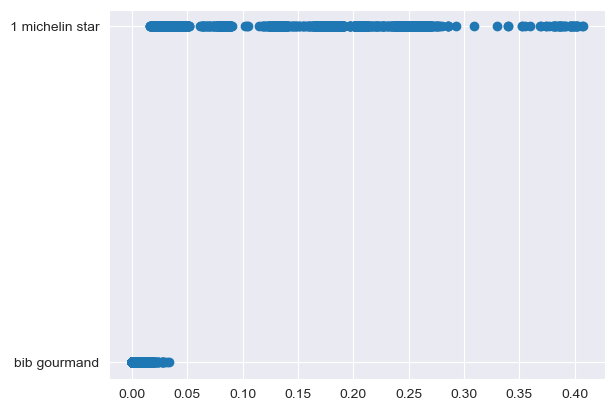

In [ ]:
# create array of probabilities

y_pred_proba = np.array([i[1] for i in y_pred_proba])
fig = plt.figure()
ax = fig.add_subplot(111)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred)